# Avant de programmer :

Il faut :

- importer les **bibliothèques** qui nous permettront : 
    - de calculer [*numpy*], de dessiner [*matplotlib.pyplot*]
    - d'écrire "proprement" [*rc*] des formules mathématiques avec *LaTeX*

- définir les **routines** qui nous permettront :
    - d'intégrer les équations différentielles [*solution*]
    - de représenter les champs de vecteurs associés [*carquois*]

*Vous n'avez pas besoin de savoir écrire ces routines mais seulement de comprendre les arguments qu'elles utilisent.*


In [1]:
# Préambule

import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.integrate import odeint 
%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#from wand.image import Image as WImage

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def solution(F,Init,tinit,tmin,tmax,nbpas=200,args=()):
    if(tmin==tinit):
        tmoins=np.array([tinit])
        Solmoins=np.array([Init])
    else:
        tmoins=np.linspace(tinit,tmin,nbpas,dtype=np.float32)
        Solmoins=odeint(F,Init,tmoins,args)
        
    if(tmax==tinit):
        tplus=np.array([tinit])
        Solplus=np.array([Init])
    else:
        tplus=np.linspace(tinit,tmax,nbpas,dtype=np.float32)
        Solplus=odeint(F,Init,tplus,args)
        
    t=np.concatenate((tmoins[::-1],tplus),axis=0)
    Sol=np.concatenate((Solmoins[::-1],Solplus),axis=0)
    return t, Sol.T

def norme(a,b):
    return sqrt(a*a+b*b)+0.000001 #on empeche la norme de devenir nulle

def carquois(F,xmin,xmax,ymin,ymax,nbpas=30j,args=()):
    Y,X=np.mgrid[ymin:ymax:nbpas,xmin:xmax:nbpas]
    if args==():
        U,V=np.float32(np.apply_along_axis(F,0,np.asarray([X,Y]),0))
    else:
        U,V=np.float32(np.apply_along_axis(F,0,np.asarray([X,Y]),0,args))
   
    Un,Vn=U/np.float32(norme(U,V)), np.float32(V/norme(U,V))   
    quiver(X,Y,Un,Vn,
        norme(U,V),                # couleur liee a la vitesse
        cmap=cm.winter,pivot='middle',linewidth=0.1)
    plt.xlim(xmin,ymax)
    plt.ylim(ymin,ymax)
    del X,Y,U,V,Un,Vn
    
def flux(F,xmin,xmax,ymin,ymax,nbpas=30j,densite=2,epaisseur=3,args=()):
    Y,X=np.mgrid[ymin:ymax:nbpas,xmin:xmax:nbpas]
    if args==():
        U,V=np.float32(F(np.asarray([X,Y]),0))
    else:
        U,V=np.float32(F(np.asarray([X,Y]),0,args))
    vitesse=np.float32(norme(U,V))
    vitesse=vitesse/vitesse.max()
    plt.streamplot(X,Y,U,V,
               color=vitesse,
               linewidth=epaisseur,
               cmap=plt.cm.winter,
               density=densite)
    plt.xlim(xmin,ymax)
    plt.ylim(ymin,ymax)
    del X,Y,U,V,vitesse

# 1 Premier exemple

On cherche à représenter les solutions de l'équation différentielle :
$$(\mathcal E_1) \qquad x'(t) = x(t) + t.$$

## 1.1 L'équation homogène associée :
$$(\mathcal E_0) \qquad x'(t) = x(t).$$

Les solutions du problèmes aux initiales sont :
$$\left\{\begin{array}{lcl}
x'(t) &=& x(t) \\ x(t_0) &=& x_0
\end{array}\right.
\qquad\iff\qquad
\left\{\begin{array}{lcl}
x(t) &=& K\exp(t) \\ K &=& x_0 \exp(-t_0)
\end{array}\right.$$

On peut écrire l'équation $(\mathcal E_0)$ sous la forme :
$$\frac{dX}{dt} = f_0(X) \qquad\text{avec :}\qquad X \in \mathbb R \qquad\text{et :}\qquad f_0(X) = X.$$ 

### 1.1.1 Définition de la fonction 

La fonction $f_0$ que l'on doit définir a 2 arguments :

- *l'inconnue* $X$ [un tableau]
- *la variable* $t$ [un réel] par rapport à laquelle on dérive 

In [2]:
def f0(X,t) :
    [x]=X
    return x

**Remarque :** On aurait pu aussi écrire :


In [3]:
def f0(X,t):
    return X[0]


### 1.1.2 Résolution de l'équation 

Pour résoudre l'équation :
$$\left\{\begin{array}{lcl} X' &=& F(X) \\ X(t_{init}) &=& X_{init} \end{array}\right.
 \quad\text{sur l'intervalle}\quad [t_{min},t_{max}]$$
 on écrira : **solution(F, Xinit, tinit, tmin, tmax)**

La routine **solution** prend donc 5 arguments qui sont dans l'ordre :

- $F$ une fonction 
- $X_{init}$ un tableau
- $t_{init}$ un réel
- $t_{min}$ un réel
- $t_{max}$ un réel 

 et on obtient en réponse  $(t, X)$ où :

- $t$ est une liste de 200 points $(t_i)$ dans l'intervalle $[t_{min}\times t_{max}$]
- $X$ est le tableau des valeurs $X(t_i)$

Ainsi pour calculer la solution de :
$$\left\{\begin{array}{lcl} X' &=& f_0(X) \\ X(0) &=& 1 \end{array}\right.
\quad\text{sur l'intervalle}\quad [-2,1]$$
on écrira :

In [4]:
# Résolution : 
t,[x] = solution(f0,[1],0,-2,1)
#t,[x] = solution(f0,[1],0,-2,2)
#m,[x] = solution(f1,[1],0,0,1)
#n,[x] = solution(f2,[1],0,0,0)

### 1.1.3 Représentation des solutions

On utilise par cela la fonction **plot** dans laquelle on peut préciser :

- la taille de la figure
- le nom des axes 
- les valeurs limites le long des axes 
- le nom de la figure

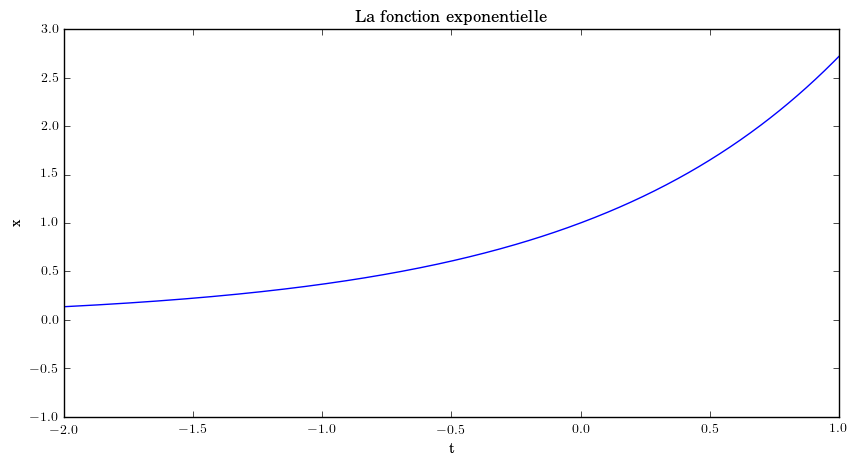

In [5]:
# mise en place de la figure
plt.figure(figsize=(10,5))

plt.xlabel('t')
plt.ylabel('x')

plt.xlim(-2,1)
plt.ylim(-1,3)

plt.title('La fonction exponentielle')

# Tracé de la solution
plot(t,x)

**Exercice :** Vérifier que le résultat de **solution(f0,[1],0,-2,1)** est bien la fonction $x(t) = \exp(t)$ en traçant également le graphe de l'exponentielle.

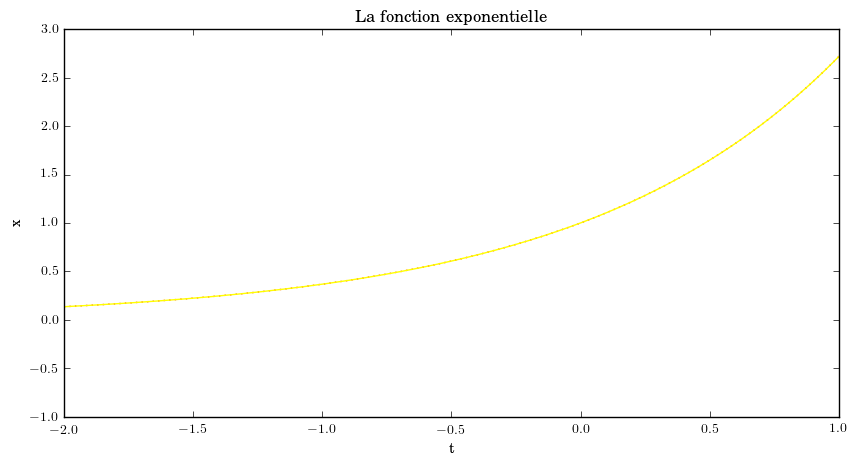

In [6]:

# mise en place de la figure
plt.figure(figsize=(10,5))

plt.xlabel('t')
plt.ylabel('x')

plt.xlim(-2,1)
plt.ylim(-1,3)

plt.title('La fonction exponentielle')

plot(t,np.exp(t),'r:')
plot(t,x,'yellow')
#plot(m,x,'black')

**Exercice :** Faites varier les arguments $t_{min}$ et $t_{max}$ pour obtenir la solution $x(t) = \exp(t)$ sur les intervalles $[-2, 0]$, $[0, 1]$ et $[0, 0]$.

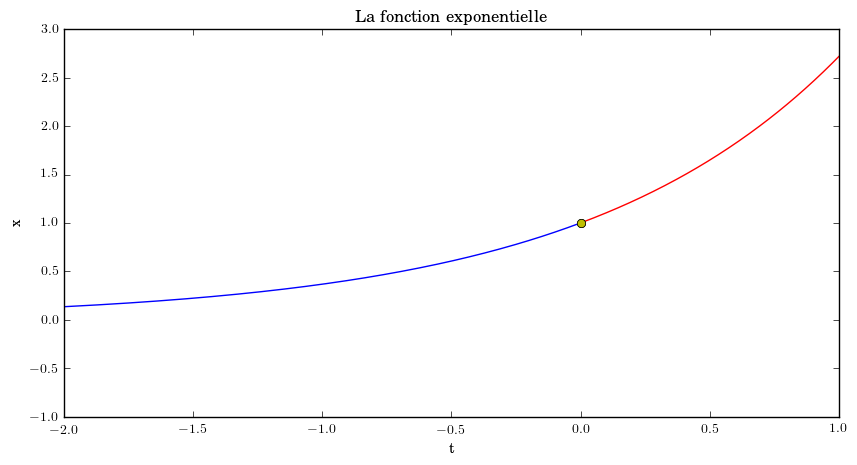

In [7]:

# mise en place de la figure
plt.figure(figsize=(10,5))

plt.xlabel('t')
plt.ylabel('x')

plt.xlim(-2,1)
plt.ylim(-1,3)

plt.title('La fonction exponentielle')

#plot(t,np.exp(t),'r:.')
#plot(t,x,'yellow')
t1,[x1] = solution(f0,[1],0,0,1)
plot(t1,x1,'r')
t1,[x1] = solution(f0,[1],0,-2,0)
plot(t1,x1,'b')
t1,[x1] = solution(f0,[1],0,0,0)
plot(t1,x1,'yo')

#t2,[x2] = solution(f0,[1],0,-1,1)
#plot(t2,x2,'b')

**Exercice :** Faites varier [*changer*l es arguments $X_{init}$ et $t_{init}$ pour obtenir encore la solution $x(t) = \exp(t)$.

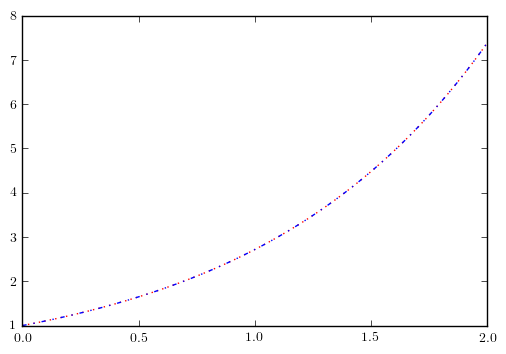

In [8]:
t1,[x1] = solution(f0,[np.exp(1)],1,0,2)
plot(t1,x1,'r:')

t1,[x1] = solution(f0,[1],0,0,2)
plot(t1,x1,'b-.')


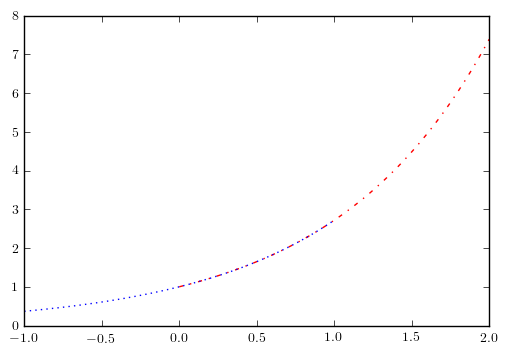

In [9]:
t1,[x1] = solution(f0,[np.exp(1)],1,0,2)
plot(t1,x1,'r-.')

t1,[x1] = solution(f0,[1],0,-1,1)
plot(t1,x1,'b:')

**Exercice :** En utilisant 2 fois la fonction **solution** et en changeant la valeur de $X_{init}$, réprésenter, sur un même graphe, les fonctions $x(t) = \exp(t)$ et $x(t) = -\exp(t)$.

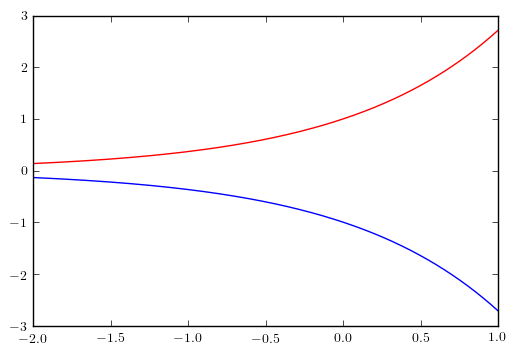

In [10]:
t1,[x1] = solution(f0,[1],0,-2,1)
plot(t1,x1,'r')
t1,[x1] = solution(f0,[-1],0,-2,1)
plot(t1,x1,'b')


### 1.1.4 Utilisation d'une boucle for 

Nous pouvons également tracer la famille des solutions du problème :
$$\left\{\begin{array}{lcl}
x'(t) &=& x(t) \\ x(0) &=& i
\end{array}\right.$$
pour différentes valeurs de $i$

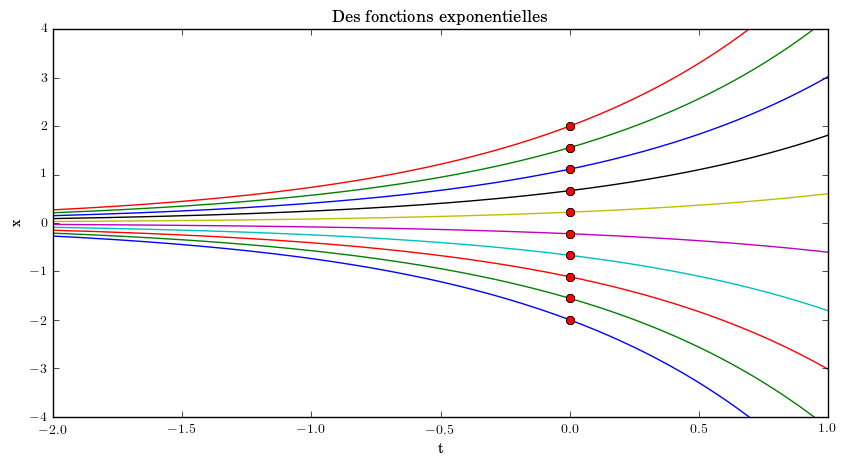

In [11]:
# mise en place de la figure
plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(-2,1)
plt.ylim(-4,4)
plt.title('Des fonctions exponentielles')

for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x]=solution(f0,[i],0,-2,1)
    plt.plot(t,x)

    t,[x]=solution(f0,[i],0,0,0) # On représente également la condition initiale
    plt.plot(t,x,'ro')

**Question** Pourquoi n'obtient-on pas la solution $x(t) = 0$ ?

Modifier le code pour l'obtenir.

In [12]:
print(np.linspace(-2,2,11))

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]


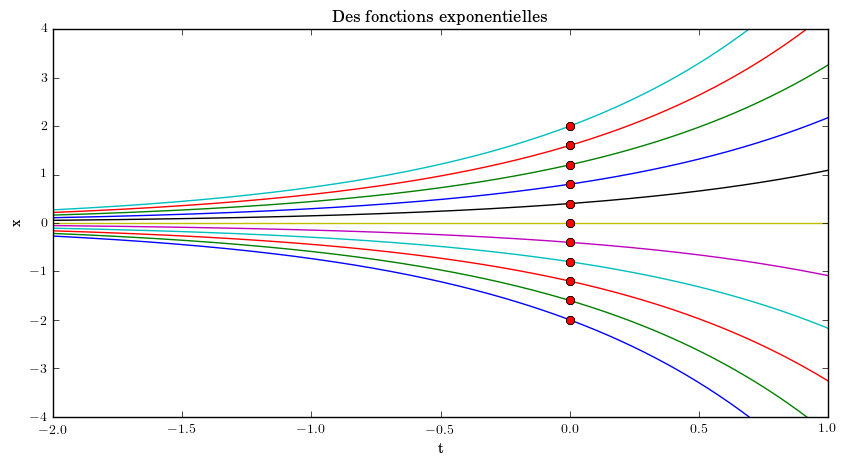

In [13]:
# mise en place de la figure
plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(-2,1)
plt.ylim(-4,4)
plt.title('Des fonctions exponentielles')

for i in np.linspace(-2,2,11): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x]=solution(f0,[i],0,-2,1)
    plt.plot(t,x)

    t,[x]=solution(f0,[i],0,0,0) # On représente également la condition initiale
    plt.plot(t,x,'ro')

**Exercice :** Représenter de même les solutions des problèmes :
$$\left\{\begin{array}{lcl}
x'(t) &=& x(t) \\ x(-2) &=& i
\end{array}\right.
\qquad\text{et}\qquad
\left\{\begin{array}{lcl}
x'(t) &=& x(t) \\ x(1) &=& i
\end{array}\right.$$
pour 20 valeurs de $i$ comprises entre -4 et 4.

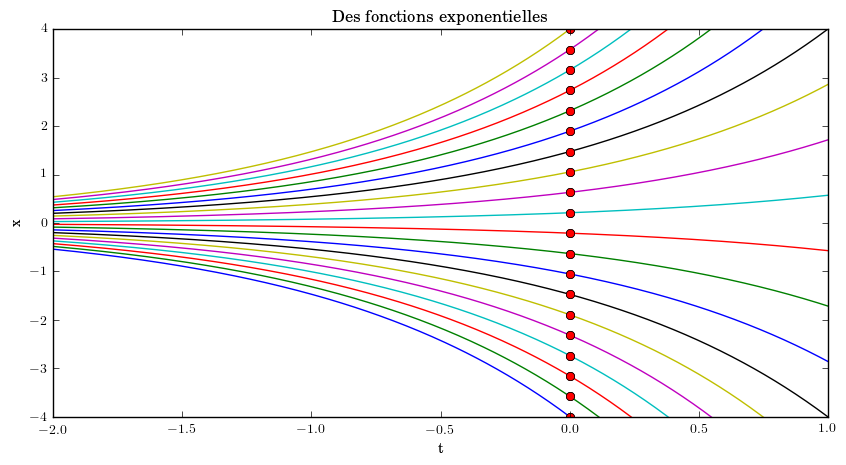

In [14]:
# mise en place de la figure
plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(-2,1)
plt.ylim(-4,4)
plt.title('Des fonctions exponentielles')

for i in np.linspace(-4,4,20): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x]=solution(f0,[i],0,-2,1)
    plt.plot(t,x)

    t,[x]=solution(f0,[i],0,0,0) # On représente également la condition initiale
    plt.plot(t,x,'ro')

**Exercice :** Que faut-il écrire pour obtenir la figue suivante :

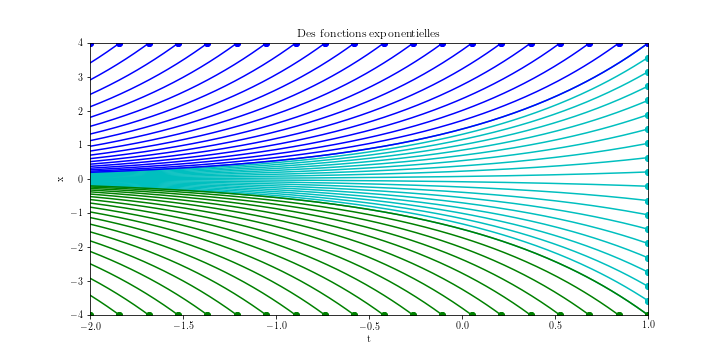

In [15]:
from IPython.display import Image
Image(filename="TP1_2018_fig1.png",width=800,height=400)

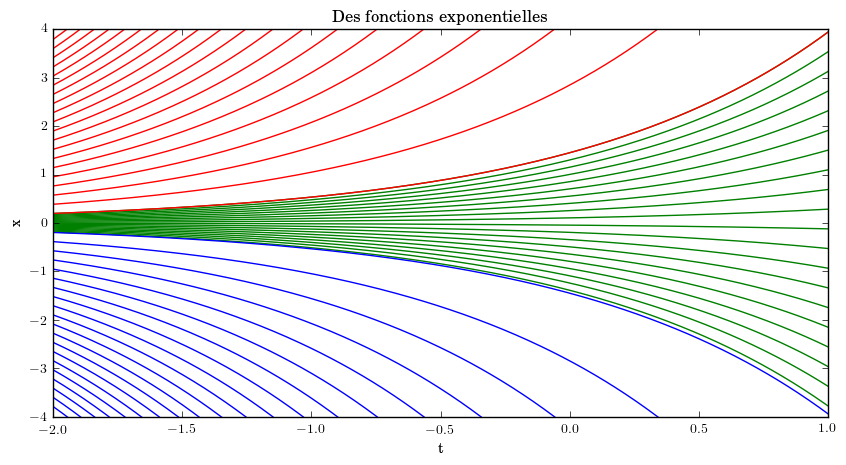

In [16]:
# mise en place de la figure
plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(-2,1)
plt.ylim(-4,4)
plt.title('Des fonctions exponentielles')

for i in np.linspace(-1.39,1.45,20): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x]=solution(f0,[i],0,-2,1)
    plt.plot(t,x,"green")

    
    
for i in np.linspace(1.45,28,20): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x]=solution(f0,[i],0,-2,1)
    plt.plot(t,x,"red")

        
    
for i in np.linspace(-1.45,-28,20): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    t,[x]=solution(f0,[i],0,-2,1)
    plt.plot(t,x,"blue")

### 1.1.5 Représentation du champ de vecteurs

On peut aussi écrire l'équation 
$$(\mathcal E_0) \qquad x'(t) = x(t)$$
sous la forme :
$$X' = F_0(X)
\qquad\text{avec}\quad
X = (t, x)
\quad\text{et}\quad
F_0(X) = (1, x)$$

**Attention :** Comme la *variable* $t$ fait maintenant partie de l'*inconnue* $X$, on ne peut plus dire que l'on dérive par rapport à $t$ : la nouvelle fonction $F_0$ s'écrit :

In [17]:
def F0(X,s) :
    [t, x] = X
    return 1, x

L'avantage est que si $x(t)$ est une solution, le vecteur $F_0\big(X(t)\big)$ est un vecteur tangent au graphe de $x$ au point de paramètre $t$ : on dit que $F_0$ est le **champ de vecteurs** associé à l'équation $X' = F_0(X)$.

La fonction **carquois** permet de représenter ce champ de vecteurs :

Elle prend 5 arguments :

- $F$ une fonction
- $x_{min}$ un réel
- $x_{max}$ un réel
- $y_{min}$ un réel
- $y_{max}$ un réel

Elle calcule 900 points $X_{i, j}$ dans le rectangle $[x_{min}, x_{max}]\times[y_{min}, y_{max}]$

et représente, en chaque point $X_{i,j}$ le vecteur $F(X_{i,j})$.

Pour représenter le champ de vecteur associé à $F_0$ sur $[-2,2]\times[0,2]$ et la solution $x(t) = \exp(t)$, on écrira donc :


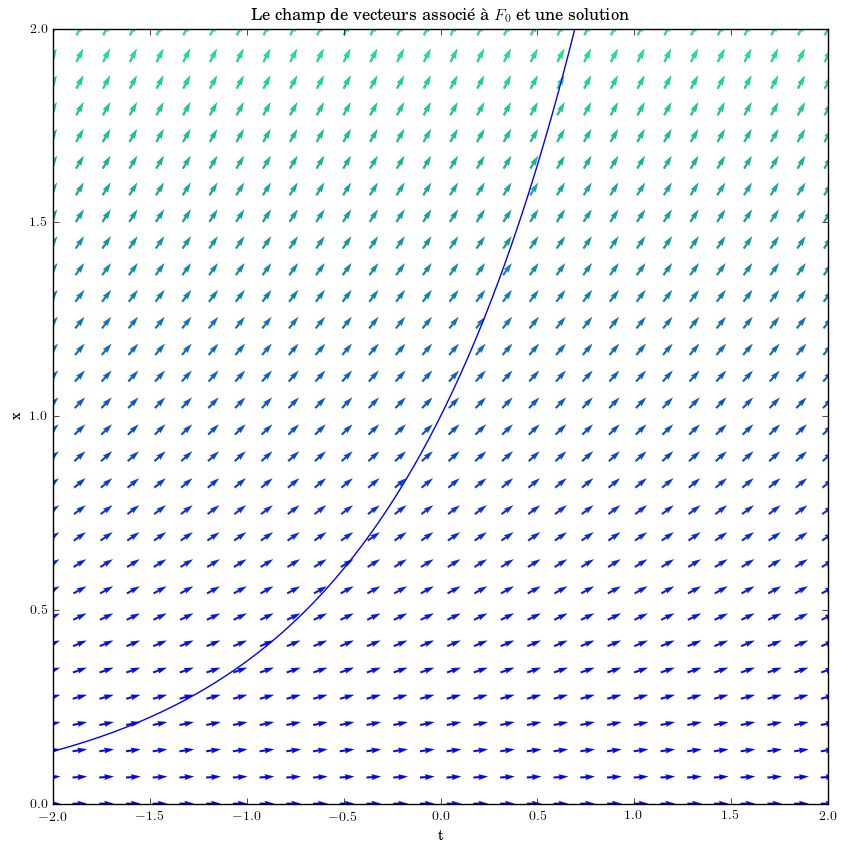

In [18]:
# mise en place de la figure
plt.figure(figsize=(10,10))
plt.xlabel('t')
plt.ylabel('x')
plt.title(r'Le champ de vecteurs associ\'e \`a $F_0$ et une solution')

# Dessin du champ de vecteurs
carquois(F0,-2,2,0,2)

# Résolution
s,[t,x] = solution(F0,[0,1],0,-2,2)
plot(t,x,'b')

**Exercice :** Représenter sur un même dessin :

- le champ de vecteur asocié à $F_0$ sur $[-2,2]\times[-2,2]$
- les solutions telles que $x(0) = i$ pour 10 valeurs de $i \in [-2, 2]$

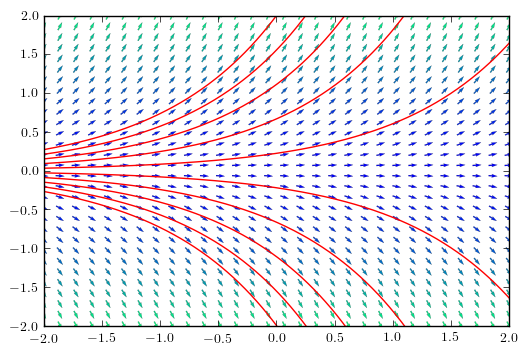

In [23]:
carquois(F0,-2,2,-2,2)



for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    s,[t,x]=solution(F0,[0,i],0,-2,2)
    plt.plot(t,x,"red")

**Exercice :** Représenter cette fois 3 familles de solutions avec des conditions initiales choisies :

- le long de l'axe $~t =\ \ ~2, \ x \in [-2,2]$
- le long de l'axe $x =\ \ ~2, \ ~t \in [-2,2]$
- le long de l'axe $x =-2, \ ~t \in [-2,2]$

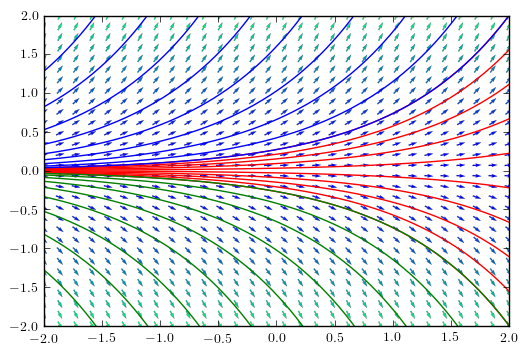

In [36]:
carquois(F0,-2,2,-2,2)

for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    s,[t,x]=solution(F0,[2,i],2,-2,2)
    plt.plot(t,x,"red")
    
for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    s,[t,x]=solution(F0,[i,2],i,-2,2)
    plt.plot(t,x,"blue")
    
for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    s,[t,x]=solution(F0,[i,-2],i,-2,2)
    plt.plot(t,x,"green")

## 1.2 L'équation complète

**Exercice :** Ecrivez la fonction $F_1$ associée à l'équation :
$$(\mathcal E_1) \qquad
x'(t) = x(t) + t$$

In [31]:
def F1(X,t):
    [t,x]=X
    return 1,x+t

**Exercice :**

- Vérifier que $x_p(t) = -t-1$ est une solution particulière de $(\mathcal E_1).$
- Quelles valeurs de $(t_{init}, X_{init})$ faut-il choisir pour la représenter ?
- Représenter sur un même dessin :

    - le champ de vecteur associé à $F_1$ dans $[-2,2]\times [-2,2]$
    - la solution $x_p$

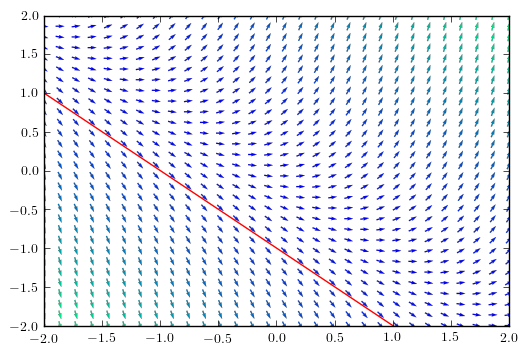

In [43]:
    carquois(F1,-2,2,-2,2)
    s,[t,x]=solution(F1,[0,-1],0,-2,2)
    plt.plot(t,x,"red")

**Exercice :** Représenter en plus  3 familles de solutions avec des conditions initiales choisies :

- le long de l'axe $~t =\ \ ~2, \ x \in [-2,2]$
- le long de l'axe $x =\ \ ~2, \ ~t \in [-2,2]$
- le long de l'axe $x =-2, \ ~t \in [-2,2]$

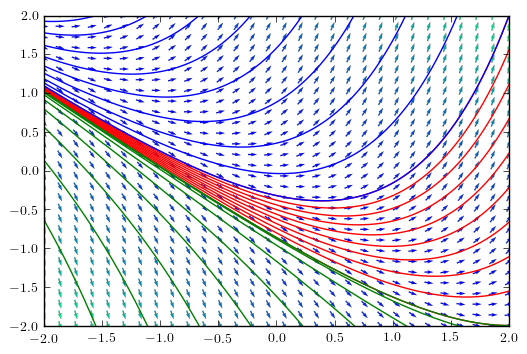

In [46]:
carquois(F1,-2,2,-2,2)

for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    s,[t,x]=solution(F1,[2,i],2,-2,2)
    plt.plot(t,x,"red")
    
for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    s,[t,x]=solution(F1,[i,2],i,-2,2)
    plt.plot(t,x,"blue")
    
for i in np.linspace(-2,2,10): # On choisit 10 valeurs régulièrement espacées entre -2 et 2
    s,[t,x]=solution(F1,[i,-2],i,-2,2)
    plt.plot(t,x,"green")

# 2. Deuxième exemple

On considère cette fois l'équation différentielle :
$$(\mathcal E_2) \qquad
x'(t) = 1 - x^2(t)$$

**Exercice :** Ecrire la fonction $F_2$ associée à $(\mathcal E_2)$.

In [48]:
def F2(X,t):
    [t,x]=X
    return 1,1-x*x

**Exercice :** Représenter sur un même dessin :

- le champ de vecteurs associé à $F_2$ sur $[-2,2]\times[-2,2]$
- les 5 solutions correspondant à $x(0) = 0, \ x(0) = \pm 1$ et $x(0) = \pm 1.1$

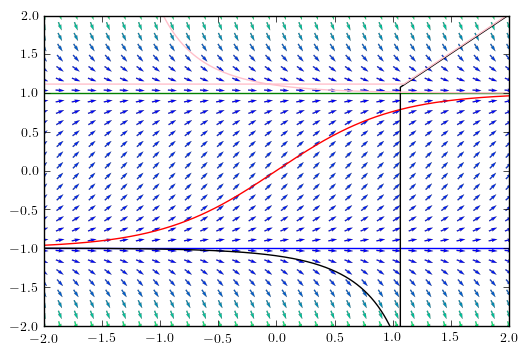

In [50]:
    carquois(F2,-2,2,-2,2)
    s,[t,x]=solution(F2,[0,0],0,-2,2)
    plt.plot(t,x,"red")

    s,[t,x]=solution(F2,[0,-1],0,-2,2)
    plt.plot(t,x,"blue")

    s,[t,x]=solution(F2,[0,1],0,-2,2)
    plt.plot(t,x,"green")

    s,[t,x]=solution(F2,[0,-1.1],0,-2,2)
    plt.plot(t,x,"black")
 
    s,[t,x]=solution(F2,[0,1.1],0,-2,2)
    plt.plot(t,x,"pink")
    

On voit sur le champ de vecteurs [et on a démontré en cours !] que les solutions de l'équation qui vérifient $x(t_0) = x_0 \in [-1,1]$
sont définies pour $t \in \mathbb R$.

On peut donc les représenter sans prendre de précautions particulières.

**Exercice :** Représenter, sur un même dessin :

- le champ de vecteurs associé à $F_2$ sur $[-2,2]\times[-2,2]$
- les solutions de $(\mathcal E_2)$ qui vérifient $x(0) = i$ pour 20 valeurs de $i \in [-1, 1]$

Par contre les solutions de $(\mathcal E_2)$ qui vérifient $x(t_0) = x_0 > 1$ sont définies sur un intervalle **ouvert** $]\tau, +\infty]$ et vérifient 
$\lim_{t \to \tau^+}x(t) = +\infty$

On fera donc attention à les représenter simplement sur l'intervalle $[t_0, +\infty].$

**Exercice :** Représenter, sur un même dessin :

- le champ de vecteurs associé à $F_2$ sur $[-2,2]\times[-2,2]$
- les solutions de $(\mathcal E_2)$ qui vérifient $x(i) = 2$ pour 20 valeurs de $i \in [-1, 1]$

**Exercice :** Que faut-il écrire pour obtenir la figure suivante ?

In [ ]:
from IPython.display import Image
Image(filename="TP1_2018_fig2.png",width=800,height=800)

# 3. Troisième exemple

On considère cette fois l'équation :
$$(\mathcal E_3)\qquad
x'(t) = 1 + x^2(t)$$

**Exercice :** Ecrire la fonction $F_2$ associée à $(\mathcal E_2)$.

On a montré en cours que les solutions de $(\mathcal E_3)$ sont de la forme :
$$x(t) = \tan(t + C) 
\qquad\text{avec}\quad
C \in \mathbb R
\quad\text{et}\quad
t \in ]- \frac \pi 2 - C, \frac \pi 2 - C[$$

**Exercice :** Vérifier ce résultat en traçant sur un même dessin :

- le champ de vecteur associé à $F_3$ sur $[-2, 2]\times[-2,2]$
- les graphes des fonctions $x = \tan(t)$ et $x = \tan(t + 0.5)$

**Exercice :**
Représenter sur un même dessin :

- le champ de vecteurs associé à $F_3$ sur $[-2, 2]\times[-2,2]$
- 10 solutions vérifiant $x(0) = i \in [-1.5, 1.5]$

**Attention** à bien préciser l'ensemble de définition de ces solutions !

**Exercice :** Que faut-il écrire pour obtenir la figure suivante ?

In [ ]:
from IPython.display import Image
Image(filename="TP1_2018_fig3.png",width=800,height=800)